# 1. Simplitied Desicion Tree

In [118]:
import numpy as np
import pandas as pd

class DecisionTree:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _entropy(self, y): 
        counts = np.bincount(y)  # Count the occurrences of each class
        probs = counts / len(y)  # Calculate class probabilities
        return -np.sum(probs * np.log2(probs + 1e-6))  # Compute entropy

    def _information_gain(self, y, splits): 
        total = len(y)
        entropy_y = self._entropy(y)  # Entropy of y
        entropy_splits = 0

        for split in splits:
            weight = len(split) / total  # Weight of the split
            entropy_splits += weight * self._entropy(split)  # Entropy of each splits

        return entropy_y - entropy_splits
    
    def _split_information(self, splits):
        total = len(np.concatenate(splits))
        split_info = 0

        for split in splits:
            if len(split) > 0:
                p_i = len(split) / total
                split_info -= p_i * np.log2(p_i)

        return split_info

    def _best_split(self, X, y):
        best_gain_ratio = 0
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            unique_values = np.unique(X[:, feature])  # thredshold is on training points
            for threshold in unique_values: 
                left_mask = X[:, feature] >= threshold
                right_mask = ~left_mask

                if len(y[left_mask]) > 0 and len(y[right_mask]) > 0:
                    splits = [y[left_mask], y[right_mask]]
                    gain = self._information_gain(y, splits)  # Information gain for current thredshold
                    split_info = self._split_information(splits)
                    gain_ratio = gain / (split_info + 1e-6)

                    if gain_ratio > best_gain_ratio:
                        best_gain_ratio = gain_ratio
                        best_feature = feature
                        best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y):
        
        # the entropy of any candidates split is zero
        if len(np.unique(y)) == 1:
            return int(y[0])  # Return a leaf node with the class if all labels are the same

        # the node is empty
        if len(X) == 0:
            return int(1)  # Predict y = 1 when no majority class

        feature, threshold = self._best_split(X, y)

        # all splits have zero gain ratio
        if feature is None:
            return int(1)  # Predict y = 1 when no majority class

        left_mask = X[:, feature] >= threshold
        right_mask = ~left_mask

        left_subtree = self._build_tree(X[left_mask], y[left_mask])  # Recursively build left subtree
        right_subtree = self._build_tree(X[right_mask], y[right_mask])  # Recursively build right subtree

        return (int(feature), threshold, left_subtree, right_subtree)  # Return a decision node

    def predict(self, X):
        predictions = []
        for x in X:
            node = self.tree
            while isinstance(node, tuple):
                feature, threshold, left, right = node
                if x[feature] >= threshold:
                    node = left  # Traverse left subtree
                else:
                    node = right  # Traverse right subtree
            predictions.append(node)

        return np.array(predictions)
    
    def visualize_tree(self):
        self._visualize_node(self.tree, depth=0)

    def _visualize_node(self, node, depth):
        if isinstance(node, int):
            print(f"{'  ' * depth}Class {node}")
        else:
            feature, threshold, left, right = node
            print(f"{'  ' * depth}Feature {feature} >= {threshold}")
            self._visualize_node(left, depth + 1)
            self._visualize_node(right, depth + 1)

# 2. Questions

## 2-2. Our algorithm is greedy

In [119]:
X = np.array([[1.2, 2.3], [2.1, 1.9], [3.5, 4.0]])
y = np.array([0, 1, 0])

tree = DecisionTree()
tree.fit(X, y)

test_data = np.array([[2.8, 3.2], [1.0, 2.0]])
predictions = tree.predict(test_data)

print(predictions)

[0 1]


## 2-3. Information gain ration exercise

In [122]:
druns = pd.read_csv('./Homework 2 data/Druns.txt', sep=" ", header=None)
druns_tree = DecisionTree()
druns_tree.fit(np.array(druns[[0, 1]]), np.array(druns[2]))

druns_tree.visualize_tree()

Feature 1 >= 8.0
  Class 1
  Feature 1 >= 0.0
    Feature 1 >= 6.0
      Feature 1 >= 7.0
        Class 0
        Class 1
      Class 0
    Feature 0 >= 0.1
      Class 0
      Class 1


## 2-4. The king of interpretabilit

In [121]:
d3leaves = pd.read_csv('./Homework 2 data/D3leaves.txt', sep=" ", header=None)

tree_d3leaves = DecisionTree()
tree_d3leaves.fit(np.array(d3leaves[[0, 1]]), np.array(d3leaves[2]))

tree_d3leaves.visualize_tree()

Feature 0 >= 10
  Class 1
  Feature 1 >= 3
    Class 1
    Class 0


## 2-5. Or is it?

In [123]:
d1leaves = pd.read_csv('./Homework 2 data/D1.txt', sep=" ", header=None)

tree_d1leaves = DecisionTree()
tree_d1leaves.fit(np.array(d1leaves[[0, 1]]), np.array(d1leaves[2]))

tree_d1leaves.visualize_tree()

Feature 1 >= 0.201829
  Class 1
  Class 0


In [124]:
d2leaves = pd.read_csv('./Homework 2 data/D2.txt', sep=" ", header=None)

tree_d2leaves = DecisionTree()
tree_d2leaves.fit(np.array(d2leaves[[0, 1]]), np.array(d2leaves[2]))

tree_d2leaves.visualize_tree()

Feature 0 >= 0.533076
  Feature 1 >= 0.228007
    Feature 1 >= 0.424906
      Class 1
      Feature 0 >= 0.708127
        Class 1
        Feature 1 >= 0.32625
          Feature 0 >= 0.595471
            Feature 0 >= 0.646007
              Class 1
              Feature 1 >= 0.403494
                Class 1
                Class 0
            Class 0
          Class 0
    Feature 0 >= 0.887224
      Feature 1 >= 0.037708
        Feature 1 >= 0.082895
          Class 1
          Feature 0 >= 0.960783
            Class 1
            Class 0
        Class 0
      Feature 0 >= 0.850316
        Feature 1 >= 0.169053
          Class 1
          Class 0
        Class 0
  Feature 1 >= 0.88635
    Feature 0 >= 0.041245
      Feature 0 >= 0.104043
        Class 1
        Feature 0 >= 0.07642
          Class 0
          Class 1
      Class 0
    Feature 1 >= 0.691474
      Feature 0 >= 0.254049
        Class 1
        Feature 0 >= 0.191915
          Feature 1 >= 0.792752
            Class 1
       

## 2-6. Hypothesis space

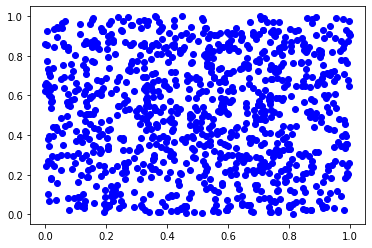

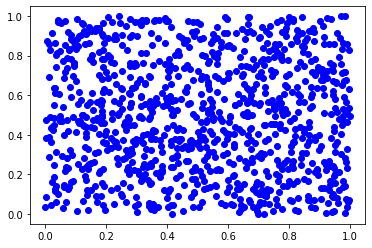

In [126]:
import matplotlib.pyplot as plt

plt.scatter(d1leaves[0], d1leaves[1], c ="blue")
plt.show()
plt.scatter(d2leaves[0], d2leaves[1], c ="blue")
plt.show()

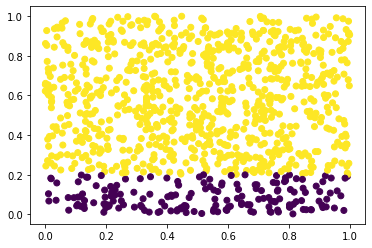

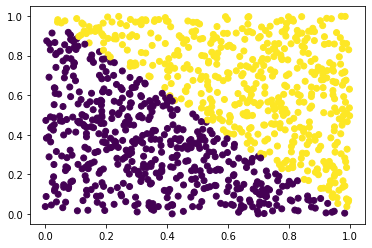

In [128]:
plt.scatter(d1leaves[0], d1leaves[1], c=d1leaves[2])
plt.show()
plt.scatter(d2leaves[0], d2leaves[1], c=d2leaves[2])
plt.show()

## 2-7. Learning curve

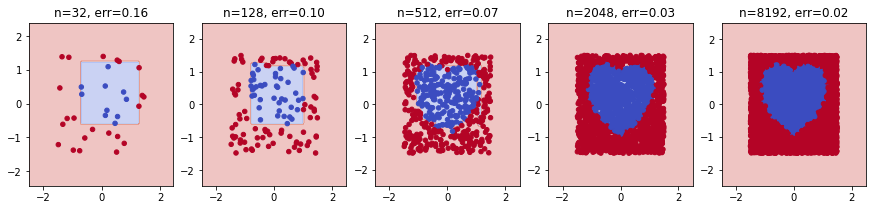

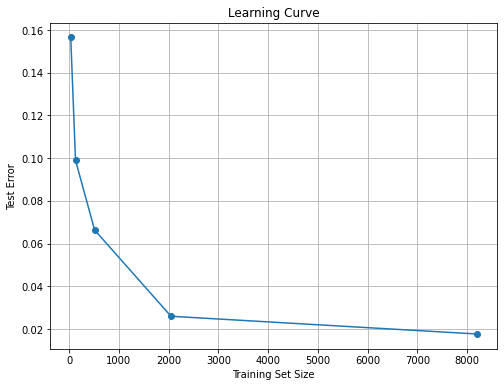

In [130]:
Dbig = pd.read_csv('./Homework 2 data/Dbig.txt', sep=" ", header=None)

X = np.array(Dbig[[0,1]])
y = np.array(Dbig[2])

indices = np.random.permutation(len(X))

candidate_train_size = 8192
candidate_train_indices = indices[:candidate_train_size]
test_indices = indices[candidate_train_size:]

# create empty lists to store results
train_sizes = [32, 128, 512, 2048, 8192]
tree_nodes = []
test_errors = []

# create subplots to visualize decision boundaries
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i, train_size in enumerate(train_sizes):
    train_indices = indices[:train_size]

    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    tree = DecisionTree()
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)

    test_error = 1 - np.mean(y_pred == y_test)
    test_errors.append(test_error)

    # visualize the decision boundary
    xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                         np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20)
    axs[i].set_title(f'n={train_size}, err={test_error:.2f}')

# plot the learning curve (test error vs. training set size)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, test_errors, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Test Error')
plt.title('Learning Curve')
plt.grid(True)
plt.show()


# 3. sklearn

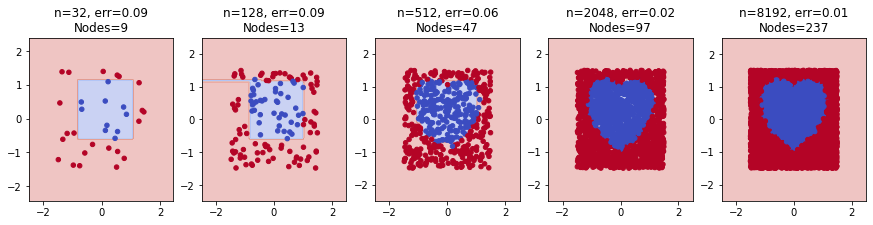

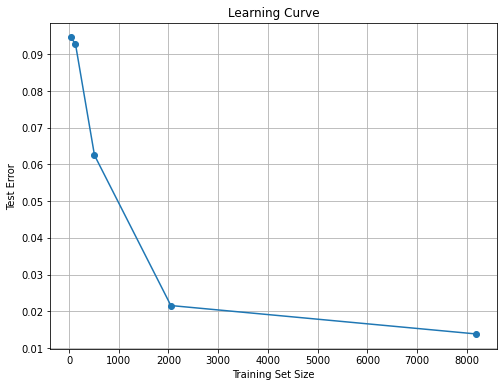

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

train_sizes = [32, 128, 512, 2048, 8192]
tree_nodes = []
test_errors = []

# create subplots to visualize decision boundaries
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i, train_size in enumerate(train_sizes):
    train_indices = indices[:train_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)

    num_nodes = tree.tree_.node_count

    y_pred = tree.predict(X_test)
    
    test_error = 1 - np.mean(y_pred == y_test)

    tree_nodes.append(num_nodes)
    test_errors.append(test_error)

    xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                         np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20)
    axs[i].set_title(f'n={train_size}, err={test_error:.2f}\nNodes={num_nodes}')

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, test_errors, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Test Error')
plt.title('Learning Curve')
plt.grid(True)
plt.show()
